In [0]:
import os
os.chdir("/content/drive/My Drive/Neuro/HW03")

In [18]:
!pwd

/content/drive/My Drive/Neuro/HW03


In [0]:
!pip install brian2
!pip install matplotlib==3.1.2

In [0]:
from brian2 import *
%matplotlib inline
import draw_utils

**Section #1 - Simulation of Neural Networks With Excitatory and Inhibitory Synapses**
$$$$

Question 1



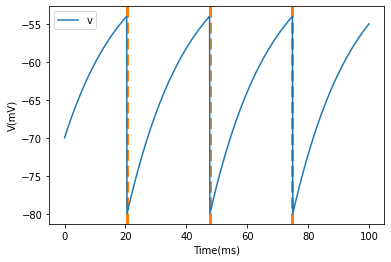

In [0]:
start_scope()

#parameters
tau_m = 20*ms
El = -70*mV
IeRm = 25*mV
V_th = -54*mV
rm = 10*Mohm

#equation
eqs = '''
dv/dt = (IeRm - (v - El))/tau_m : volt
'''
N = 1
G = NeuronGroup(N, eqs, method='exact', reset='v = -80*mV', threshold='v>V_th')
G.v[0] = El
statemon = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(G)
run(100*ms)
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
plot(statemon.t/ms, statemon.v[0]/mV, label='v')
xlabel('Time(ms)');
ylabel('V(mV)');
legend();
#grid()


--------------------------------

Question 2 - two excitatory neurons

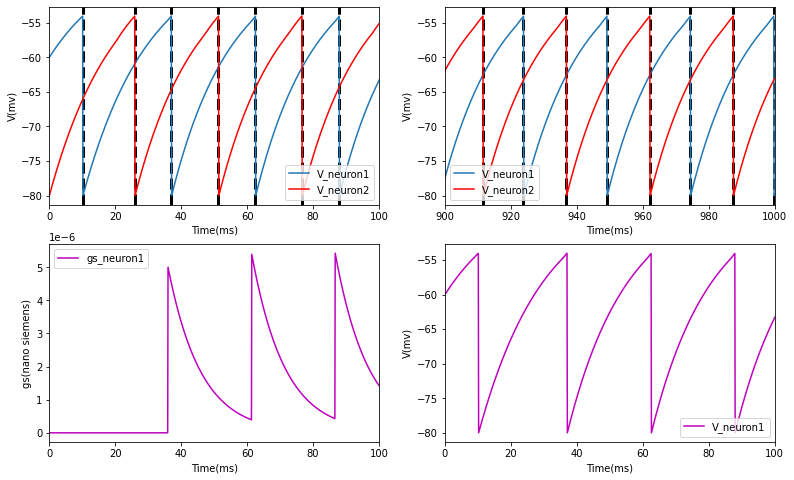

In [0]:
start_scope()

#parameters
tau_m = 20*ms
El = -70*mV
IeRm = 25*mV
V_th = -54*mV
rm = 10*Mohm
Es = 0*mV #Excitatory

#equation
eqs = '''
dv/dt = (IeRm - (v - El) - rm*gs*(v - Es))/tau_m : volt
dgs/dt = (-gs)/(10*ms) : siemens
'''

N = 2
G = NeuronGroup(N, eqs, method='euler', reset='v = -80*mV', threshold='v>V_th')
G.v = [-60*mV , -80*mV]
G.gs = [0, 0] *nS
S = Synapses(G, G, on_pre = 'gs+=5*nS')
S.connect(condition='i!=j') # The connection form is 1 --> 2 and 2 --> 1
S.delay = 10*ms

statemon = StateMonitor(G, ('gs','v'), record=True)
spikemon = SpikeMonitor(G)
run(1000*ms)

plt.figure(figsize=(13,8))
subplot(2,2,1)
for t in spikemon.t: # drawing all the spikes of network
    axvline(t/ms, ls='--', c='k', lw=3,)
plot(statemon.t/ms, statemon.v[0]/mV, label='V_neuron1')
plot(statemon.t/ms, statemon.v[1]/mV, c='r', label='V_neuron2')
xlim(0,100);
legend();
xlabel('Time(ms)');
ylabel('V(mv)');
subplot(2,2,2)
for t in spikemon.t:
    axvline(t/ms, ls='--', c='k', lw=3)
plot(statemon.t/ms, statemon.v[0]/mV, label='V_neuron1')
plot(statemon.t/ms, statemon.v[1]/mV, c='r', label='V_neuron2')
xlim(900,1000);
legend();
xlabel('Time(ms)');
ylabel('V(mv)');

subplot(2,2,3)
plot(statemon.t/ms, statemon.gs[0]/mV, c='m', label='gs_neuron1')
xlim(0,100);
legend();
xlabel('Time(ms)');
ylabel('gs(nano siemens)');
subplot(2,2,4)
plot(statemon.t/ms, statemon.v[0]/mV, c='m', label='V_neuron1')
xlim(0,100);
legend();
xlabel('Time(ms)');
ylabel('V(mv)');

We can see the neurons **alternate** in exciting one another in plot 1 and 2

Question 2 --> tau = 2.5ms

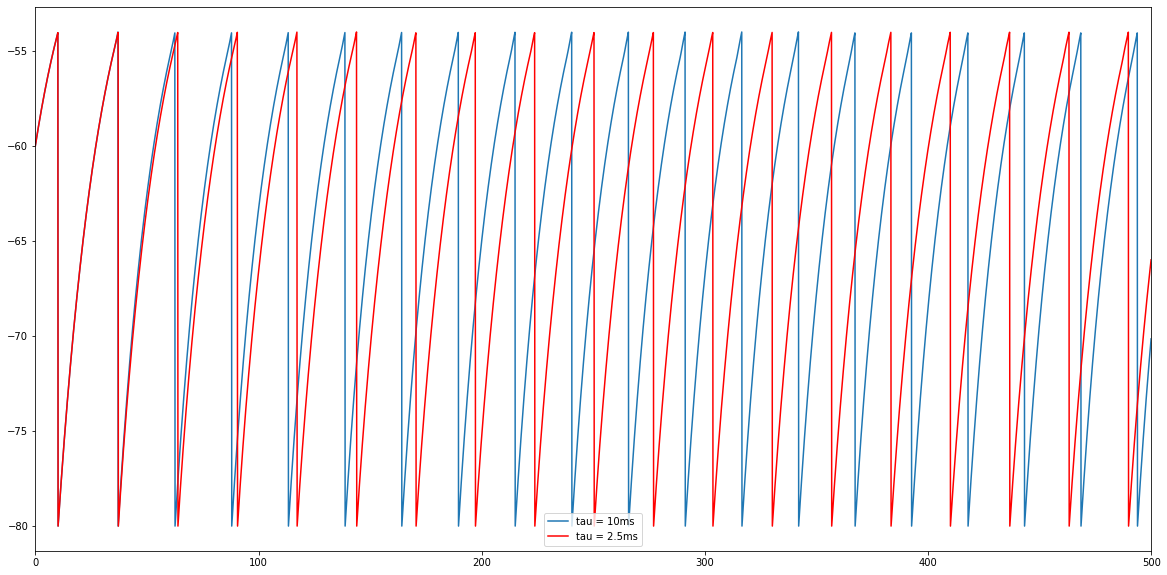

In [0]:
start_scope()
#parameters
tau_m = 20*ms
El = -70*mV
IeRm = 25*mV
V_th = -54*mV
rm = 10*Mohm
Es = 0*mV #Excitatory

#equation
eqs = '''
dv/dt = (IeRm - (v - El) - rm*gs*(v - Es))/tau_m : volt
dgs/dt = (-gs)/(tau) : siemens
tau : second
'''

N = 2
G1 = NeuronGroup(N, eqs, method='euler', reset='v = -80*mV', threshold='v>V_th')
G1.v = [-60*mV , -80*mV]
G1.gs = [0, 0] *nS
G1.tau = 10*ms
S1 = Synapses(G1, G1, on_pre = 'gs+=5*nS')
S1.connect(condition='i!=j') # The connection form is 1 --> 2 and 2 --> 1
S1.delay = 10*ms

G2 = NeuronGroup(N, eqs, method='euler', reset='v = -80*mV', threshold='v>V_th')
G2.v = [-60*mV , -80*mV]
G2.gs = [0, 0] *nS
G2.tau = 2.5*ms
S2 = Synapses(G2, G2, on_pre = 'gs+=5*nS')
S2.connect(condition='i!=j') # The connection form is 1 --> 2 and 2 --> 1
S2.delay = 10*ms

statemonG1 = StateMonitor(G1, ('gs','v'), record=True)
statemonG2 = StateMonitor(G2, ('gs','v'), record=True)
run(500*ms)

plt.figure(figsize=(20,10))
#subplot(2,1,1)
plot(statemonG1.t/ms, statemonG1.v[0]/mV, label = 'tau = 10ms')
#subplot(2,1,2)
plot(statemonG2.t/ms, statemonG2.v[0]/mV, label = 'tau = 2.5ms', c = 'r')
xlim(0,500)
legend(loc = 'lower center');

Number of spikes for tau=**10ms** in 500ms is 20 and for tau=**2.5ms**, it's 19 so we can see a decrease in firing rate.

----------------------------------------
Question 3 - two inhibitory neurons

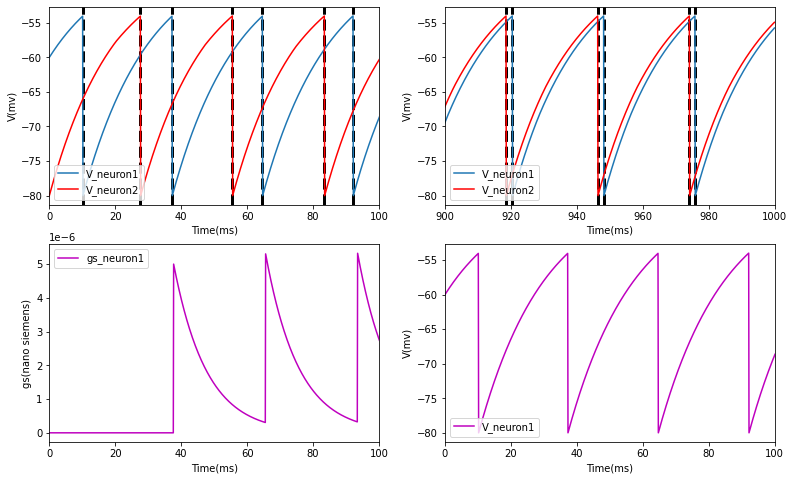

In [0]:
start_scope()

#parameters
tau_m = 20*ms
El = -70*mV
IeRm = 25*mV
V_th = -54*mV
rm = 10*Mohm
Es = -80*mV #Inhibitory

#equation
eqs = '''
dv/dt = (IeRm - (v - El) - rm*gs*(v - Es))/tau_m : volt
dgs/dt = (-gs)/(10*ms) : siemens
'''

N = 2
G = NeuronGroup(N, eqs, method='euler', reset='v = -80*mV', threshold='v>V_th')
G.v = [-60*mV , -80*mV]
G.gs = [0, 0] *nS
S = Synapses(G, G, on_pre = 'gs+=5*nS')
S.connect(condition='i!=j') # The connection form is 1 --> 2 and 2 --> 1
S.delay = 10*ms

statemon = StateMonitor(G, ('gs','v'), record=True)
spikemon = SpikeMonitor(G)
run(1000*ms)

plt.figure(figsize=(13,8))
subplot(2,2,1)
for t in spikemon.t: # drawing all the spikes of network
    axvline(t/ms, ls='--', c='k', lw=3,)
plot(statemon.t/ms, statemon.v[0]/mV, label='V_neuron1')
plot(statemon.t/ms, statemon.v[1]/mV, c='r', label='V_neuron2')
xlim(0,100);
legend();
xlabel('Time(ms)');
ylabel('V(mv)');
subplot(2,2,2)
for t in spikemon.t:
    axvline(t/ms, ls='--', c='k', lw=3)
plot(statemon.t/ms, statemon.v[0]/mV, label='V_neuron1')
plot(statemon.t/ms, statemon.v[1]/mV, c='r', label='V_neuron2')
xlim(900,1000);
legend();
xlabel('Time(ms)');
ylabel('V(mv)');

subplot(2,2,3)
plot(statemon.t/ms, statemon.gs[0]/mV, c='m', label='gs_neuron1')
xlim(0,100);
legend();
xlabel('Time(ms)');
ylabel('gs(nano siemens)');
subplot(2,2,4)
plot(statemon.t/ms, statemon.v[0]/mV, c='m', label='V_neuron1')
xlim(0,100);
legend();
xlabel('Time(ms)');
ylabel('V(mv)');

We can see in plot 2, as time goes by, the 2 neurons with inhibitory synapses fire in synchrony 

Question 3 --> tau = 2.5ms

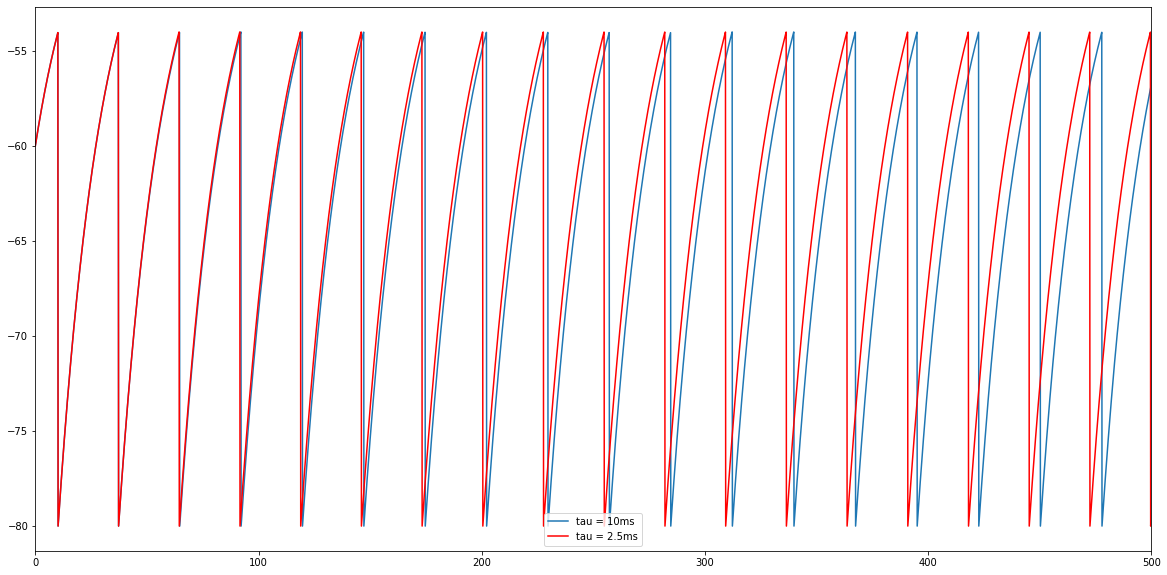

In [0]:
start_scope()
#parameters
tau_m = 20*ms
El = -70*mV
IeRm = 25*mV
V_th = -54*mV
rm = 10*Mohm
Es = -80*mV #Inhibitory

#equation
eqs = '''
dv/dt = (IeRm - (v - El) - rm*gs*(v - Es))/tau_m : volt
dgs/dt = (-gs)/(tau) : siemens
tau : second
'''

N = 2
G1 = NeuronGroup(N, eqs, method='euler', reset='v = -80*mV', threshold='v>V_th')
G1.v = [-60*mV , -80*mV]
G1.gs = [0, 0] *nS
G1.tau = 10*ms
S1 = Synapses(G1, G1, on_pre = 'gs+=5*nS')
S1.connect(condition='i!=j') # The connection form is 1 --> 2 and 2 --> 1
S1.delay = 10*ms

G2 = NeuronGroup(N, eqs, method='euler', reset='v = -80*mV', threshold='v>V_th')
G2.v = [-60*mV , -80*mV]
G2.gs = [0, 0] *nS
G2.tau = 2.5*ms
S2 = Synapses(G2, G2, on_pre = 'gs+=5*nS')
S2.connect(condition='i!=j') # The connection form is 1 --> 2 and 2 --> 1
S2.delay = 10*ms

statemonG1 = StateMonitor(G1, ('gs','v'), record=True)
statemonG2 = StateMonitor(G2, ('gs','v'), record=True)
run(500*ms)

plt.figure(figsize=(20,10))
#subplot(2,1,1)
plot(statemonG1.t/ms, statemonG1.v[0]/mV, label = 'tau = 10ms')
#subplot(2,1,2)
plot(statemonG2.t/ms, statemonG2.v[0]/mV, label = 'tau = 2.5ms', c = 'r')
xlim(0,500)
legend(loc = 'lower center');

Like question 2 we see a subtle change in frequency but this time the frequenct increases over time for tau=**2.5ms**

-------------------------------------

**Section#2 - Stability in Recurrent Neural Networks**

Question 1

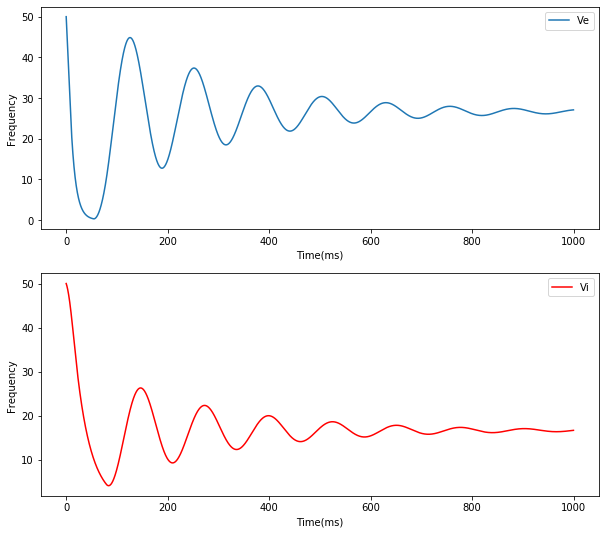

In [9]:
start_scope()
#t = linspace(-10,50,1000)
#plot(t,clip(t, a_min=0, a_max=None))

#Parameters
tau_E = 10*ms
MEE = 1.25
MEI = -1
gama_E = -10*hertz
MIE = 1
MII = 0
gama_I = 10*hertz

#Equations
#dve/dt = (-ve + clip(MEE*ve + MEI*vi - gama_E, 0, 10000)) / tauE : hertz
eqsE = '''
dve/dt = (-ve + clip(MEE*ve + MEI*vi - gama_E, 0, 10000)) / tau_E : hertz
vi : hertz (linked)
'''

#dvi/dt = (-vi + clip(MIE*ve + MII*vi - gama_I, 0, 10000)) / tau_I : hertz
eqsI = '''
dvi/dt = (-vi + clip(MIE*ve + MII*vi - gama_I, 0, 10000)) / tau_I : hertz
tau_I : second
ve : hertz (linked)
'''

E = NeuronGroup(1, eqsE, method='euler')
I = NeuronGroup(1, eqsI, method='euler')

E.vi = linked_var(I,'vi')
I.ve = linked_var(E,'ve')

E.ve = 50*hertz
I.vi = 50*hertz
I.tau_I = 30*ms

statemonE = StateMonitor(E,'ve',record=True)
statemonI = StateMonitor(I,'vi',record=True)
run(1000*ms)

plt.figure(figsize=(10,9))
subplot(2,1,1)
plot(statemonE.t/ms, statemonE.ve[0]/hertz, label='Ve');
legend();
xlabel('Time(ms)');
ylabel('Frequency');
subplot(2,1,2)
plot(statemonI.t/ms, statemonI.vi[0]/hertz, label='Vi' , c='r');
legend();
xlabel('Time(ms)');
ylabel('Frequency');

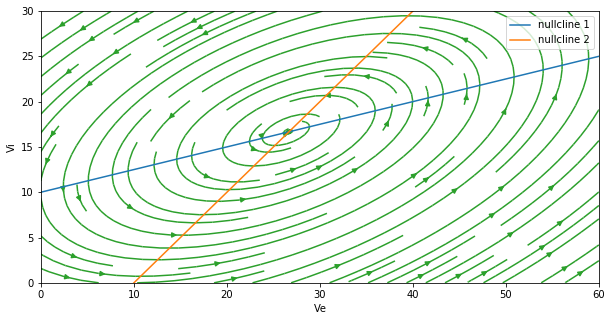

In [11]:
def F(Ve, Vi, params):
    return (-Ve + 1.25*Ve - 1*Vi + 10)/0.01

def G(Ve, Vi, params):
    return (-Vi + 1*Ve + 0*Vi - 10)/0.03

def f_null1(ve, params):
    return -ve + 1.25*ve + 10

def f_null2(ve, params):
    return ve - 10

params = 0    
draw_utils.plot_phaseplane(F, G, f_null1, f_null2, extra_params=params, x_range=[0,60], y_range=[0,30]) 
xlabel('Ve');   
ylabel('Vi');

We can see the phase plane plot is exactly like the one in page 26 of slide#3

No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


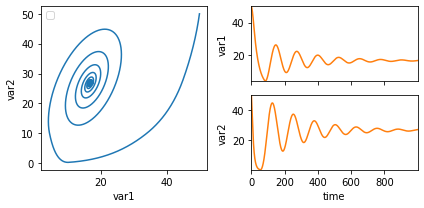

In [10]:
# pls run previous codes of question before running this part
draw_utils.phaseplane_animation(statemonE.t/ms, statemonI.vi[0]/hertz, statemonE.ve[0]/hertz)

------------------------------------

Question 2

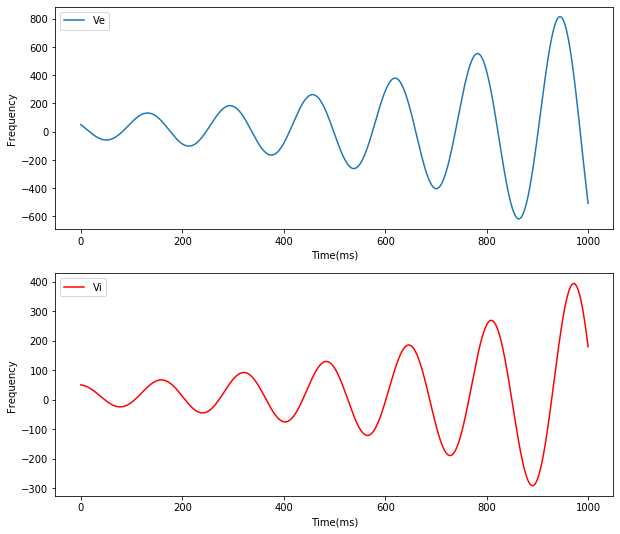

In [12]:
start_scope()
#t = linspace(-10,50,1000)
#plot(t,clip(t, a_min=0, a_max=None))

#Parameters
tau_E = 10*ms
MEE = 1.25
MEI = -1
gama_E = -10*hertz
MIE = 1
MII = 0
gama_I = 10*hertz

#Equations
#dve/dt = (-ve + clip(MEE*ve + MEI*vi - gama_E, 0, 10000)) / tauE : hertz
eqsE = '''
dve/dt = (-ve + MEE*ve + MEI*vi - gama_E) / tau_E : hertz
vi : hertz (linked)
'''

#dvi/dt = (-vi + clip(MIE*ve + MII*vi - gama_I, 0, 10000)) / tau_I : hertz
eqsI = '''
dvi/dt = (-vi + MIE*ve + MII*vi - gama_I) / tau_I : hertz
tau_I : second
ve : hertz (linked)
'''

E = NeuronGroup(1, eqsE, method='euler')
I = NeuronGroup(1, eqsI, method='euler')

E.vi = linked_var(I,'vi')
I.ve = linked_var(E,'ve')

E.ve = 50*hertz
I.vi = 50*hertz
I.tau_I = 50*ms

statemonE = StateMonitor(E,'ve',record=True)
statemonI = StateMonitor(I,'vi',record=True)
run(1000*ms)

plt.figure(figsize=(10,9))
subplot(2,1,1)
plot(statemonE.t/ms, statemonE.ve[0]/hertz, label='Ve');
legend();
xlabel('Time(ms)');
ylabel('Frequency');
subplot(2,1,2)
plot(statemonI.t/ms, statemonI.vi[0]/hertz, label='Vi' , c='r');
legend();
xlabel('Time(ms)');
ylabel('Frequency');

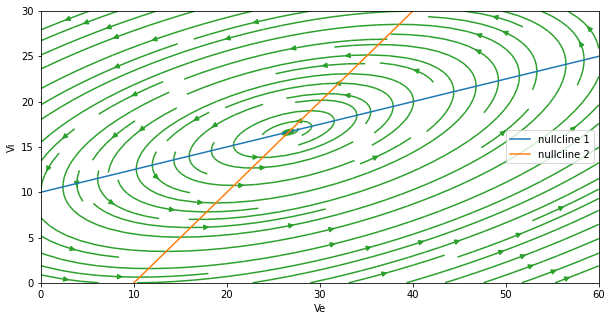

In [36]:
def F(Ve, Vi, params):
    return (-Ve + 1.25*Ve - 1*Vi + 10)/0.01

def G(Ve, Vi, params):
    return (-Vi + 1*Ve + 0*Vi - 10)/0.05

def f_null1(ve, params):
    return -ve + 1.25*ve + 10

def f_null2(ve, params):
    return ve - 10

params = 0    
draw_utils.plot_phaseplane(F, G, f_null1, f_null2, extra_params=params, x_range=[0,60], y_range=[0,30]) 
xlabel('Ve');   
ylabel('Vi');

No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


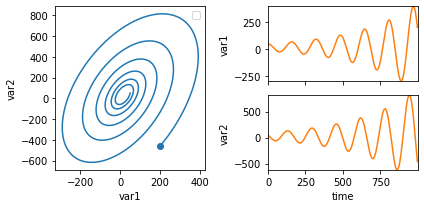

In [13]:
# pls run previous codes of question before running this part
draw_utils.phaseplane_animation(statemonE.t/ms, statemonI.vi[0]/hertz, statemonE.ve[0]/hertz)

-------------------------------------

Question 3

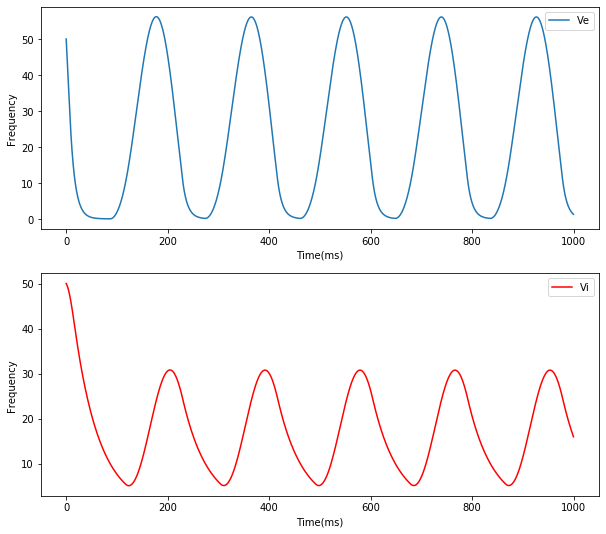

In [14]:
start_scope()
#t = linspace(-10,50,1000)
#plot(t,clip(t, a_min=0, a_max=None))

#Parameters
tau_E = 10*ms
MEE = 1.25
MEI = -1
gama_E = -10*hertz
MIE = 1
MII = 0
gama_I = 10*hertz

#Equations
#dve/dt = (-ve + clip(MEE*ve + MEI*vi - gama_E, 0, 10000)) / tauE : hertz
eqsE = '''
dve/dt = (-ve + clip(MEE*ve + MEI*vi - gama_E, 0, 10000)) / tau_E : hertz
vi : hertz (linked)
'''

#dvi/dt = (-vi + clip(MIE*ve + MII*vi - gama_I, 0, 10000)) / tau_I : hertz
eqsI = '''
dvi/dt = (-vi + clip(MIE*ve + MII*vi - gama_I, 0, 10000)) / tau_I : hertz
tau_I : second
ve : hertz (linked)
'''

E = NeuronGroup(1, eqsE, method='euler')
I = NeuronGroup(1, eqsI, method='euler')

E.vi = linked_var(I,'vi')
I.ve = linked_var(E,'ve')

E.ve = 50*hertz
I.vi = 50*hertz
I.tau_I = 50*ms

statemonE = StateMonitor(E,'ve',record=True)
statemonI = StateMonitor(I,'vi',record=True)
run(1000*ms)

plt.figure(figsize=(10,9))
subplot(2,1,1)
plot(statemonE.t/ms, statemonE.ve[0]/hertz, label='Ve');
legend();
xlabel('Time(ms)');
ylabel('Frequency');
subplot(2,1,2)
plot(statemonI.t/ms, statemonI.vi[0]/hertz, label='Vi' , c='r');
legend();
xlabel('Time(ms)');
ylabel('Frequency');

We can see after some time firing rates goes into some kind of a loop. The reason is the rectification nonlinearity which doesnt let the firing rates become negative and the firing rates get stuck in a limited cycle.

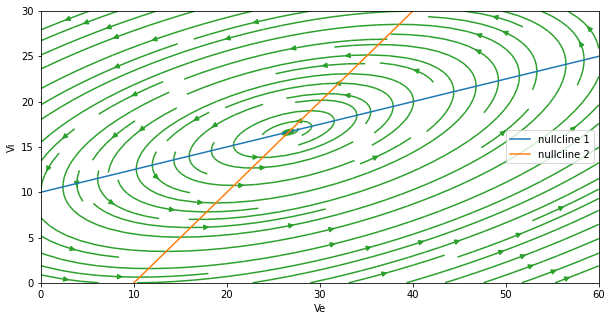

In [38]:
def F(Ve, Vi, params):
    return (-Ve + 1.25*Ve - 1*Vi + 10)/0.01

def G(Ve, Vi, params):
    return (-Vi + 1*Ve + 0*Vi - 10)/0.05

def f_null1(ve, params):
    return -ve + 1.25*ve + 10

def f_null2(ve, params):
    return ve - 10

params = 0    
draw_utils.plot_phaseplane(F, G, f_null1, f_null2, extra_params=params, x_range=[0,60], y_range=[0,30]) 
xlabel('Ve');   
ylabel('Vi');

No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


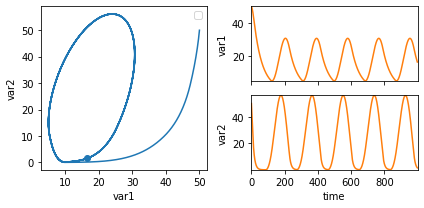

In [15]:
# pls run previous codes of question before running this part
draw_utils.phaseplane_animation(statemonE.t/ms, statemonI.vi[0]/hertz, statemonE.ve[0]/hertz)

----------------------------------

Question 4

Part 1

We know that for $\tau_i<40$ the system is stable and for $\tau_i>40$ it becomes unstable. So we now find out what happens at $\tau_i=40$

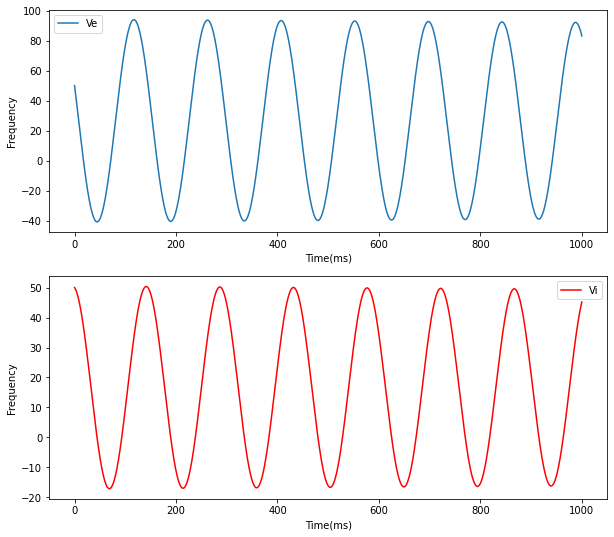

In [41]:
start_scope()
#t = linspace(-10,50,1000)
#plot(t,clip(t, a_min=0, a_max=None))

#Parameters
tau_E = 10*ms
MEE = 1.25
MEI = -1
gama_E = -10*hertz
MIE = 1
MII = 0
gama_I = 10*hertz

#Equations
#dve/dt = (-ve + clip(MEE*ve + MEI*vi - gama_E, 0, 10000)) / tauE : hertz
eqsE = '''
dve/dt = (-ve + MEE*ve + MEI*vi - gama_E) / tau_E : hertz
vi : hertz (linked)
'''

#dvi/dt = (-vi + clip(MIE*ve + MII*vi - gama_I, 0, 10000)) / tau_I : hertz
eqsI = '''
dvi/dt = (-vi + MIE*ve + MII*vi - gama_I) / tau_I : hertz
tau_I : second
ve : hertz (linked)
'''

E = NeuronGroup(1, eqsE, method='euler')
I = NeuronGroup(1, eqsI, method='euler')

E.vi = linked_var(I,'vi')
I.ve = linked_var(E,'ve')

E.ve = 50*hertz
I.vi = 50*hertz
I.tau_I = 40*ms

statemonE = StateMonitor(E,'ve',record=True)
statemonI = StateMonitor(I,'vi',record=True)
run(1000*ms)

plt.figure(figsize=(10,9))
subplot(2,1,1)
plot(statemonE.t/ms, statemonE.ve[0]/hertz, label='Ve');
legend();
xlabel('Time(ms)');
ylabel('Frequency');
subplot(2,1,2)
plot(statemonI.t/ms, statemonI.vi[0]/hertz, label='Vi' , c='r');
legend();
xlabel('Time(ms)');
ylabel('Frequency');

As we can see at the point of bifurcation, $Re\{\lambda\}=0$ and there is only imaginary parts

------------------------------------
Part 2

We also know that for a very small $\tau_i$ the imaginary part of fire rates is zero. So we try to find a $\tau_i$ from the plot in page 33 of slide#3 that this happens.

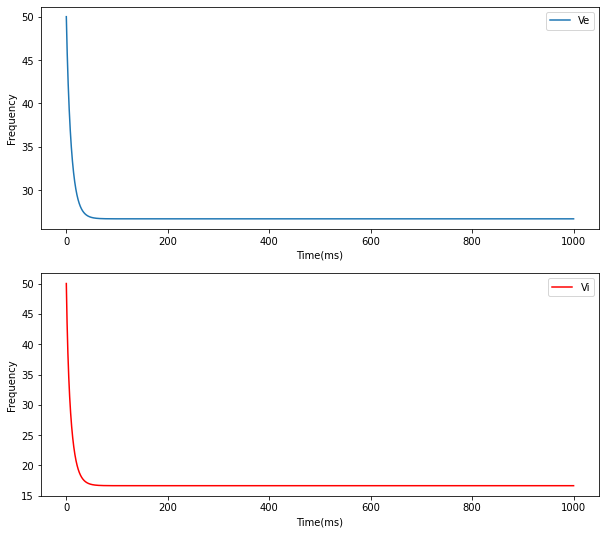

In [45]:
start_scope()
#t = linspace(-10,50,1000)
#plot(t,clip(t, a_min=0, a_max=None))

#Parameters
tau_E = 10*ms
MEE = 1.25
MEI = -1
gama_E = -10*hertz
MIE = 1
MII = 0
gama_I = 10*hertz

#Equations
#dve/dt = (-ve + clip(MEE*ve + MEI*vi - gama_E, 0, 10000)) / tauE : hertz
eqsE = '''
dve/dt = (-ve + MEE*ve + MEI*vi - gama_E) / tau_E : hertz
vi : hertz (linked)
'''

#dvi/dt = (-vi + clip(MIE*ve + MII*vi - gama_I, 0, 10000)) / tau_I : hertz
eqsI = '''
dvi/dt = (-vi + MIE*ve + MII*vi - gama_I) / tau_I : hertz
tau_I : second
ve : hertz (linked)
'''

E = NeuronGroup(1, eqsE, method='euler')
I = NeuronGroup(1, eqsI, method='euler')

E.vi = linked_var(I,'vi')
I.ve = linked_var(E,'ve')

E.ve = 50*hertz
I.vi = 50*hertz
I.tau_I = 2*ms

statemonE = StateMonitor(E,'ve',record=True)
statemonI = StateMonitor(I,'vi',record=True)
run(1000*ms)

plt.figure(figsize=(10,9))
subplot(2,1,1)
plot(statemonE.t/ms, statemonE.ve[0]/hertz, label='Ve');
legend();
xlabel('Time(ms)');
ylabel('Frequency');
subplot(2,1,2)
plot(statemonI.t/ms, statemonI.vi[0]/hertz, label='Vi' , c='r');
legend();
xlabel('Time(ms)');
ylabel('Frequency');

As we can see in the plots, the oscilation is gone so the imaginary part is zero.